In [1]:
!git clone https://github.com/Computing-Intelligence/datasource

Cloning into 'datasource'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), done.


In [2]:
!git clone https://github.com/goto456/stopwords.git

Cloning into 'stopwords'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), done.


In [3]:
!pip install snownlp

     |████████████████████████████████| 37.6MB 117kB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-cp36-none-any.whl size=37760958 sha256=242fc92f7b7ddfc3b727acf869af81ab4d30f8b6022307bf0523c1310b05a0b9
  Stored in directory: /root/.cache/pip/wheels/f3/81/25/7c197493bd7daf177016f1a951c5c3a53b1c7e9339fd11ec8f
Successfully built snownlp


In [0]:
# 验证采用 SnowNLP 分析评论，与打分之间的相关度
# 目前很火的中文情感分析库 SnowNLP，使用很方便，自带分词、分句和情感分析
# 验证其分析结果和豆瓣评分之间的相关度

from snownlp import SnowNLP
import numpy as np
import pandas as pd

In [5]:
mov = pd.read_csv('./datasource/movie_comments.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# 去除特殊值
mov=mov.drop(mov[mov['star'].isin(['star'])].index.tolist())

In [0]:
# 删除空值
mov=mov.dropna()

In [0]:
# 去除重复评论
mov.drop_duplicates(subset=['comment','star'],keep='first',inplace=True)

In [0]:
# SnowNLP 处理速度较慢，仅取前10000条评论做演示
n = 1000
mov_commnet=mov['comment'][:n]
mov_star=list(map(lambda x:int(x),(mov['star'][:n])))

In [0]:
# 通过SnowNLP 分析评论
snowed = [SnowNLP(i) for i in mov_commnet]

In [11]:
snowed[0].words

['吴', '京', '意', '淫到', '了', '脑残', '的', '地步', '，', '看', '了', '恶心', '想吐']

In [12]:
snowed[0].sentiments

0.0323066138237218

In [0]:
# 对评论去除停用词
# 这里使用哈工大的停用词表
def stopwords_list():
    with open('./stopwords/哈工大停用词表.txt') as f:
        lines = f.readlines()
        result = [i.strip('\n') for i in lines]
    return result

stopwords = stopwords_list()

In [0]:
words_pos=[]
words_neg=[]
senti = []
for i in range(n):
  # 提取SnowNLP评论指标
  senti.append(snowed[i].sentiments)
  for sword in snowed[i].words:
    if sword not in stopwords:
      if snowed[i].sentiments > 0.6:
        words_pos.append(sword)
      else:
        words_neg.append(sword)

In [19]:
words_pos[:10]

['首映', '礼', '看', '太', '恐怖', '电影', '不', '讲', '道理', '完全']

In [20]:
words_neg[:10]

['吴', '京', '意', '淫到', '脑残', '地步', '看', '恶心', '想吐', '脑子']

In [21]:
!pip install wordcloud

In [22]:
# 下载中文字体
!git clone https://github.com/zongren/font.git

Cloning into 'font'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


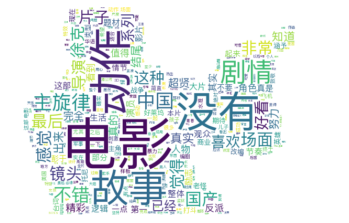

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# 增加词云轮廓模板
wordcloud_mask = np.array(Image.open('warwolf01.jpg'))

# 设置词云属性
wordcloud = WordCloud(font_path='./font/PingFang-SC-Regular.ttf',
                      background_color = 'white', mask = wordcloud_mask, 
                      max_words = 500, width = 1000, height = 600, stopwords = stopwords)
# 导入评论词
wordcloud.generate(' '.join(words_pos))

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

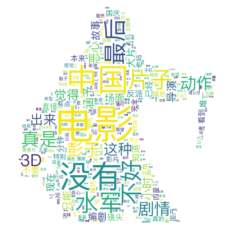

In [28]:
# 增加词云轮廓模板
wordcloud_mask = np.array(Image.open('warwolf02.jpg'))

# 设置词云属性
wordcloud = WordCloud(font_path='./font/PingFang-SC-Regular.ttf',
                      background_color = 'white', mask = wordcloud_mask, 
                      max_words = 500, width = 1000, height = 1000, stopwords = stopwords)
# 导入评论词
wordcloud.generate(' '.join(words_neg))

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# 分析 SnowNLP 分析情感的结果 与 评论中打分的星级 智建的相关性
np.cov(senti,mov_star)

array([[0.11230399, 0.11596191],
       [0.11596191, 1.77843443]])

In [0]:
# 可见，SnowNLP分析的结果与豆瓣评分正相关

In [0]:
# 把两个评级统一排序进行对于
senti.sort()
mov_star.sort()

In [0]:
import matplotlib.pyplot as plt

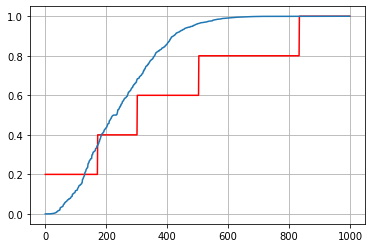

In [32]:
plt.grid(True)
plt.plot(list(map(lambda x:x/5,mov_star)),'r')
plt.plot(senti)

In [0]:
# 从整体分布上，可见SnowNLP评价偏积极